<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

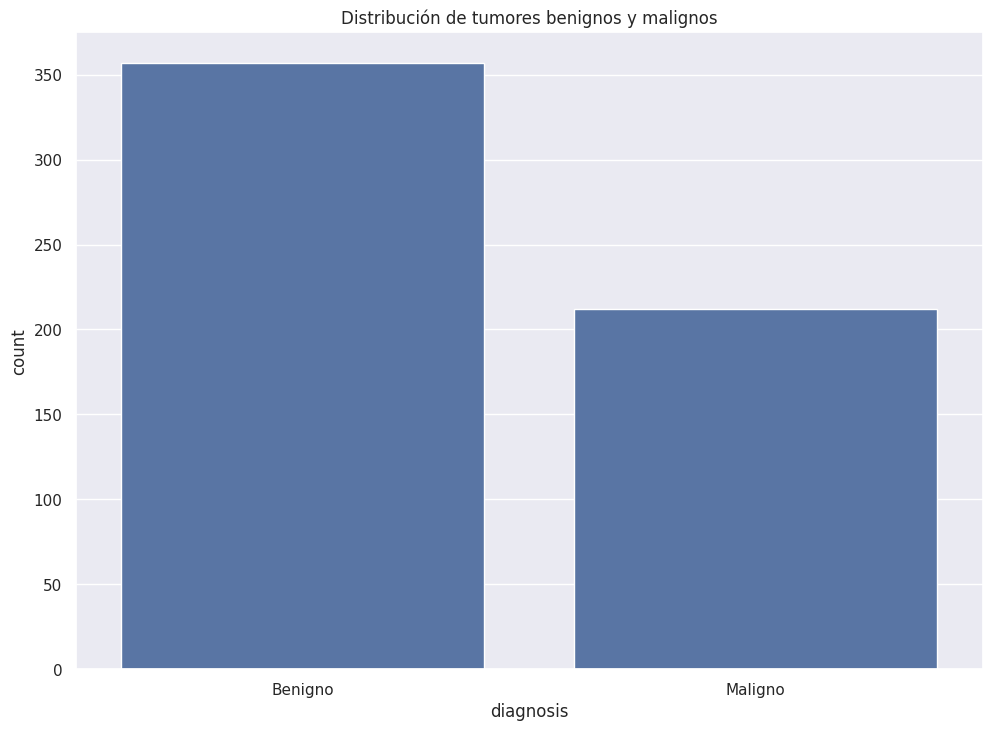

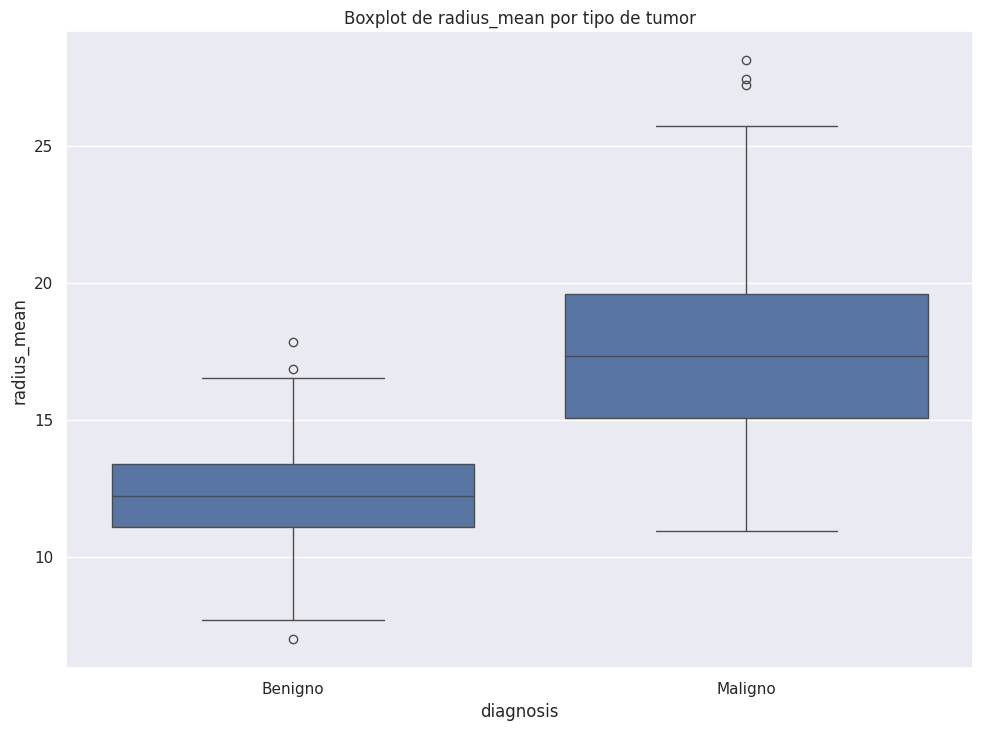

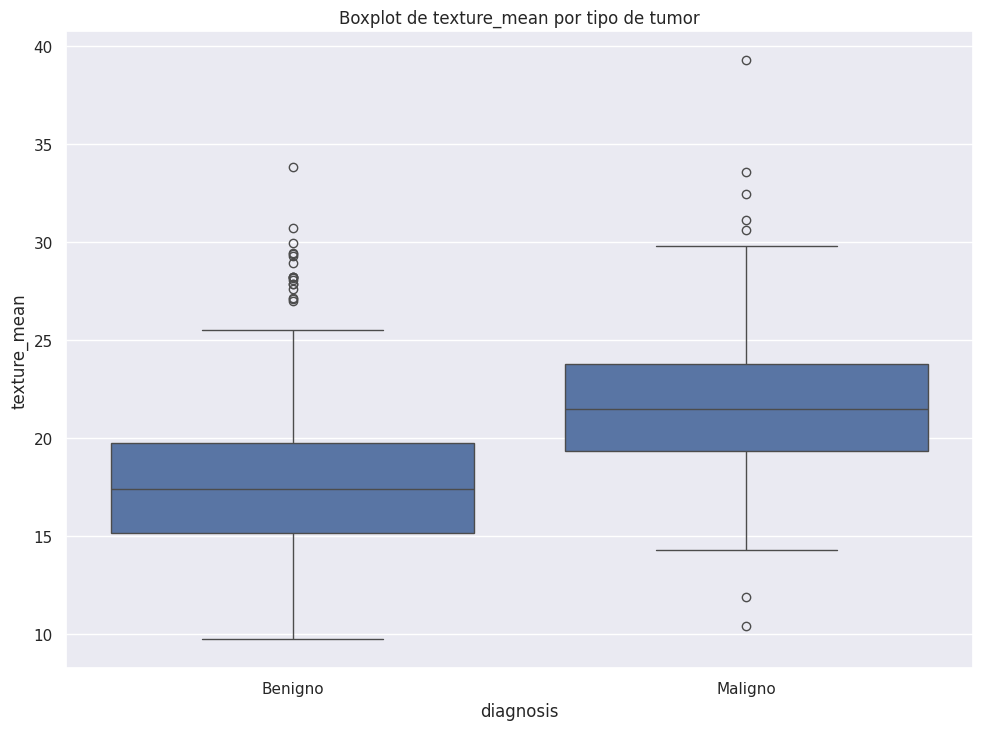

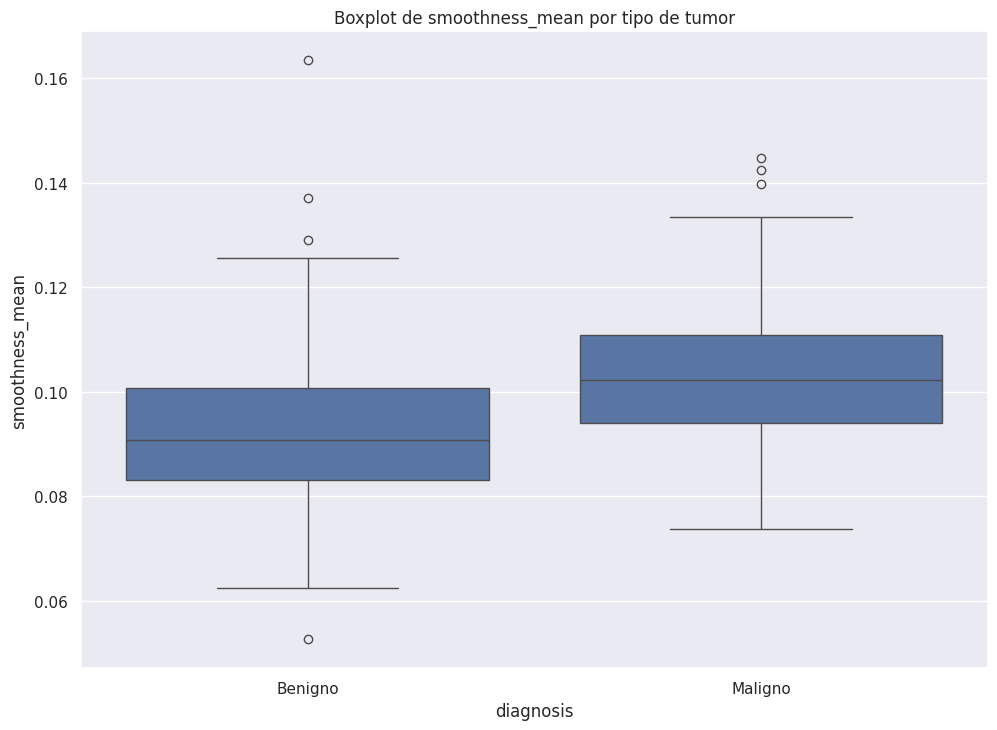

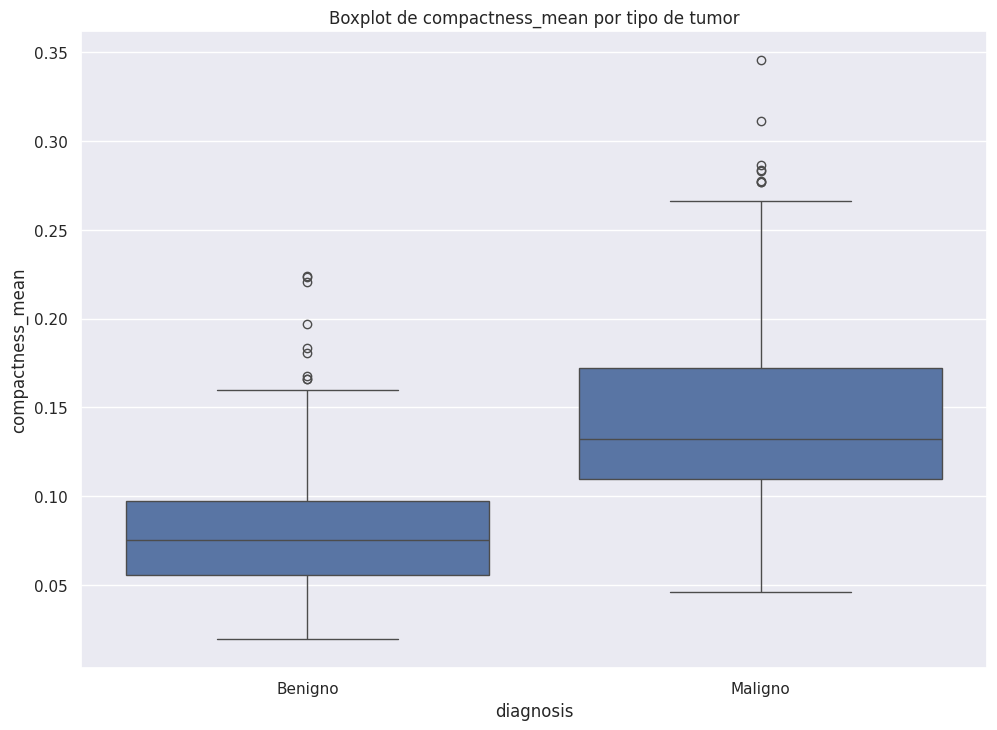

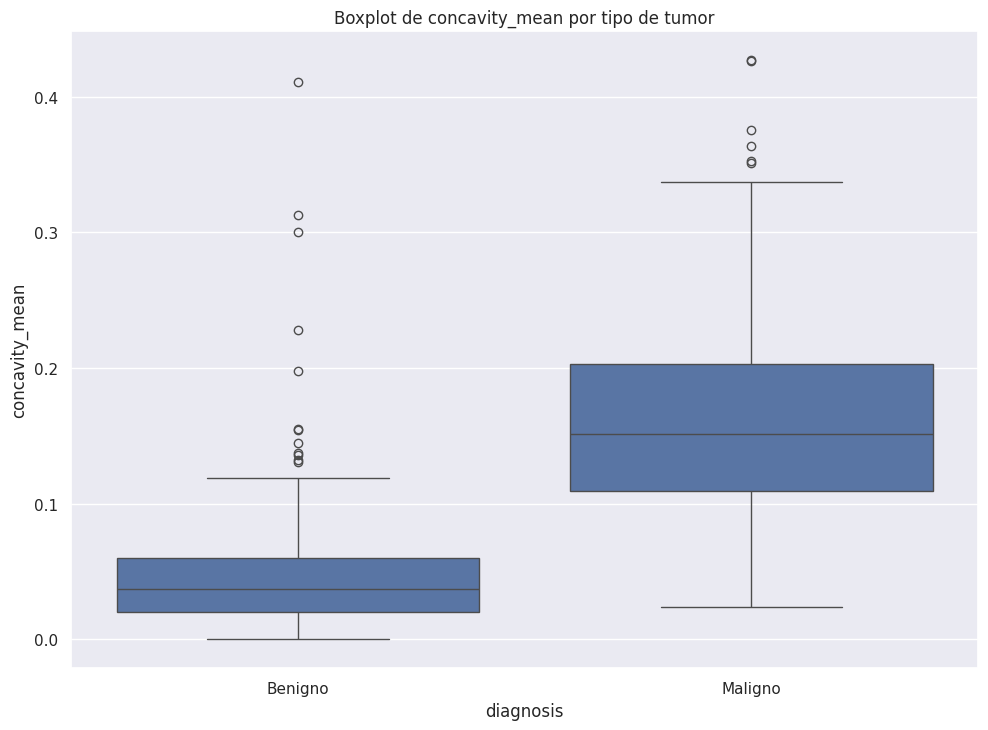

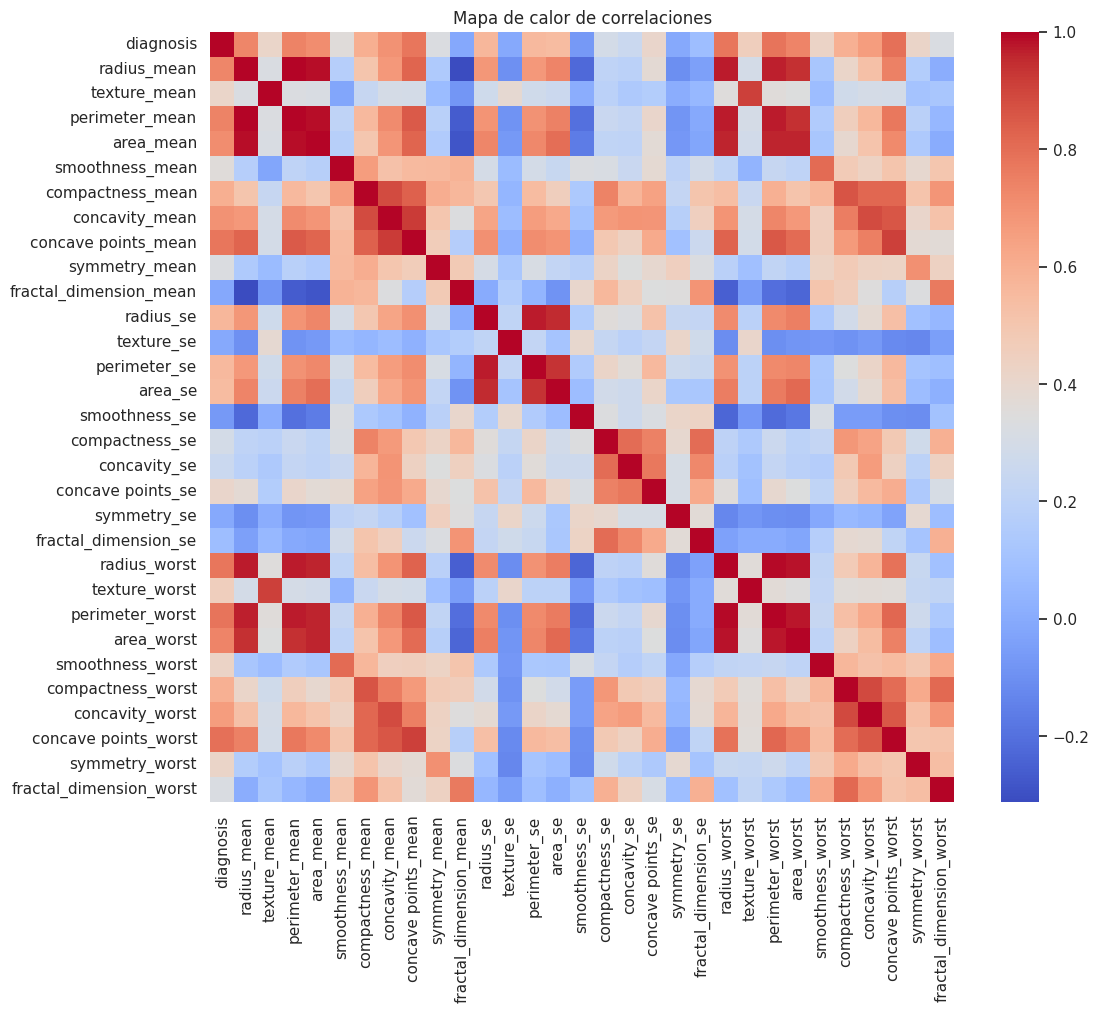

In [6]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas de todas las columnas
df.describe()

sns.countplot(x='diagnosis', data=df)
plt.title("Distribución de tumores benignos y malignos")
plt.xticks([0,1], ['Benigno', 'Maligno'])
plt.show()


# Seleccionamos algunas variables representativas
features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']

# Boxplots por tipo de tumor
for feature in features:
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f"Boxplot de {feature} por tipo de tumor")
    plt.xticks([0,1], ['Benigno', 'Maligno'])
    plt.show()


# Matriz de correlación
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

Podemos notar con la matriz de correlaciones que algunas variables están fuertemente correlacionadas, lo cual nos indica que conviene aplicar reducción de dimensionalidad.

Por otro lado, podemos notar que existen muchos valores atípicos (outliers), los cuales puedne influir en modelos sensibles.



2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [7]:
# Variables predictoras
X = df.drop('diagnosis', axis=1)

# Variable objetivo
y = df['diagnosis']


#Normalizamos variables numéricas.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para mantener nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


La normalización es fundamental para modelos sensibles a la escala como SVM, Regresión Logística y para PCA.

StandardScaler transforma cada variable a media 0 y desviación estándar 1.

In [9]:
# Matriz de correlación de las variables normalizadas
corr_matrix = X_scaled.corr().abs()

# Seleccionamos pares con alta correlación
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(X_scaled.columns[i], X_scaled.columns[j])
                 for i, j in zip(*high_corr_var) if i < j]

print("Variables altamente correlacionadas (>0.9):")
print(high_corr_var)

Variables altamente correlacionadas (>0.9):
[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('concavity_mean', 'concave points_mean'), ('concave points_mean', 'concave points_worst'), ('radius_se', 'perimeter_se'), ('radius_se', 'area_se'), ('perimeter_se', 'area_se'), ('radius_worst', 'perimeter_worst'), ('radius_worst', 'area_worst'), ('perimeter_worst', 'area_worst')]


Variables muy correlacionadas aportan información redundante y pueden afectar interpretabilidad y eficiencia.

Por cada par altamente correlacionado, podemos eliminar una variable, elegigmos la que tenga menor correlación con la variable objetivo diagnosis.


In [10]:
# Lista de variables a eliminar
to_drop = ['perimeter_mean', 'area_mean',
           'perimeter_worst', 'area_worst',
           'concave points_mean', 'concave points_worst',
           'perimeter_se', 'area_se', 'texture_worst']

X_reduced = X_scaled.drop(columns=to_drop)

print("Variables restantes tras eliminar multicolinealidad:")
print(X_reduced.columns.tolist())

Variables restantes tras eliminar multicolinealidad:
['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


Quedamos con un conjunto de variables menos correlacionadas, que aún capturan la mayor parte de la información discriminativa.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Vamos a aplicar PCA sobre las variables preprocesadas (X_reduced) para reducir la dimensionalidad y analizar cómo se separan las clases de tumores. Incluiremos visualizaciones y análisis de la varianza explicada.

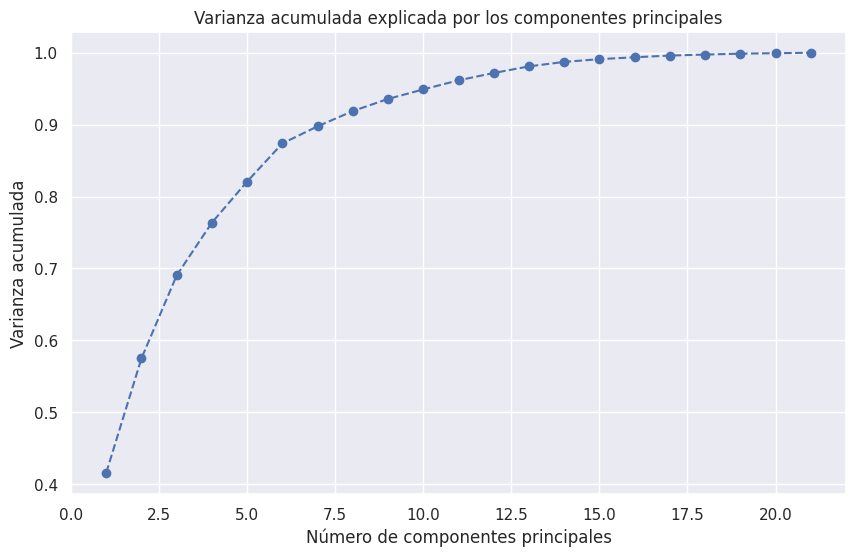

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_reduced)

#Proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cum_variance = explained_variance.cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), cum_variance, marker='o', linestyle='--')
plt.title("Varianza acumulada explicada por los componentes principales")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.show()

El gráfico indica cuántos componentes necesitamos para capturar la mayor parte de la varianza. podemos notar que 5 componentes ya explican más del 80% de la varianza, lo cual nos indica que podemos reducir nuestro dataset a 5 dimensiones sin perder mucha información.

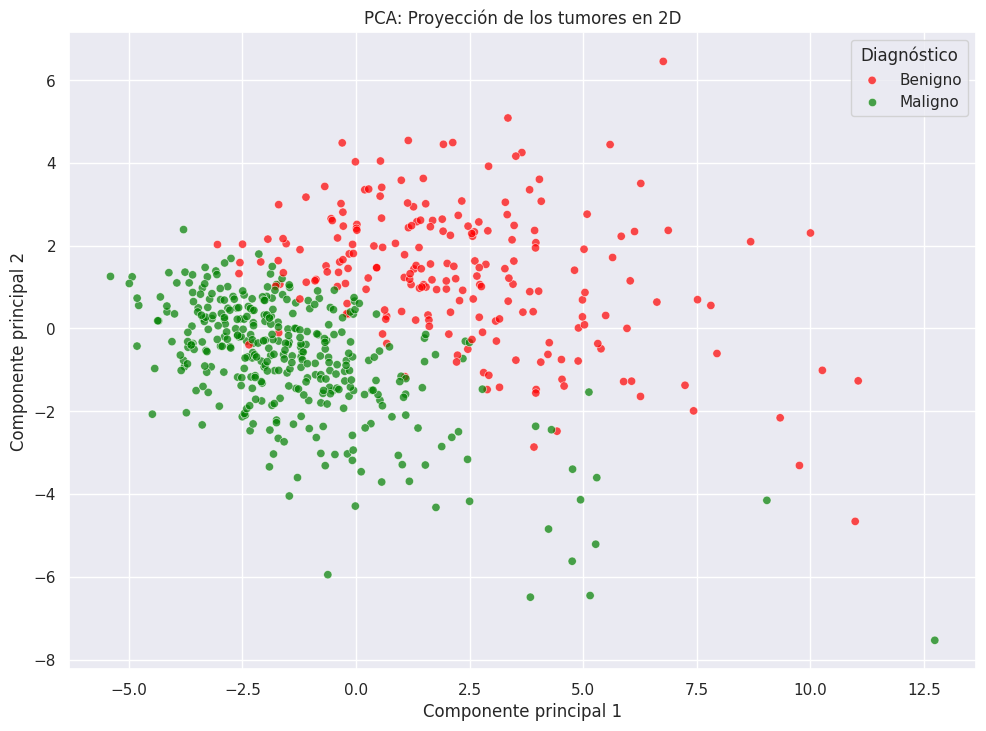

In [13]:

X_pca_2d = X_pca[:,:2]


df_pca = pd.DataFrame(X_pca_2d, columns=['PC1','PC2'])
df_pca['diagnosis'] = y.values

import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=df_pca, palette=['green','red'], alpha=0.7)
plt.title("PCA: Proyección de los tumores en 2D")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title='Diagnóstico', labels=['Benigno', 'Maligno'])
plt.show()



4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Mejores parámetros: {'C': 0.1, 'solver': 'liblinear'}
Mejores parámetros: {'C': 1, 'gamma': 'scale'}
Mejores parámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
=== Regresión Logística ===
Accuracy: 0.956140350877193
Precision: 0.9743589743589743
Recall: 0.9047619047619048
F1-score: 0.9382716049382716
AUC-ROC: 0.996362433862434
Matriz de confusión:
 [[71  1]
 [ 4 38]]

=== SVM ===
Accuracy: 0.9385964912280702
Precision: 0.9487179487179487
Recall: 0.8809523809523809
F1-score: 0.9135802469135802
AUC-ROC: 0.9904100529100529
Matriz de confusión:
 [[70  2]
 [ 5 37]]

=== Random Forest ===
Accuracy: 0.9473684210526315
Precision: 0.9736842105263158
Recall: 0.8809523809523809
F1-score: 0.925
AUC-ROC: 0.9897486772486773
Matriz de confusión:
 [[71  1]
 [ 5 37]]


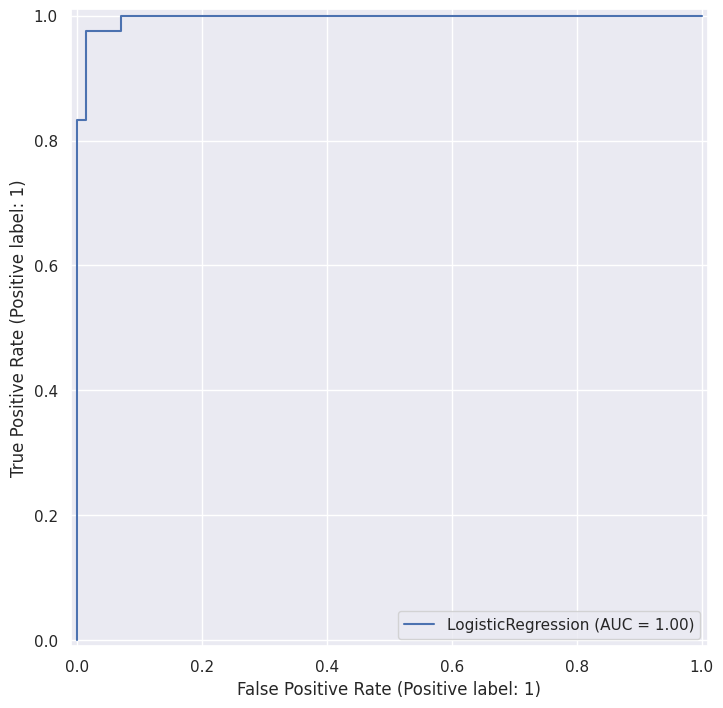

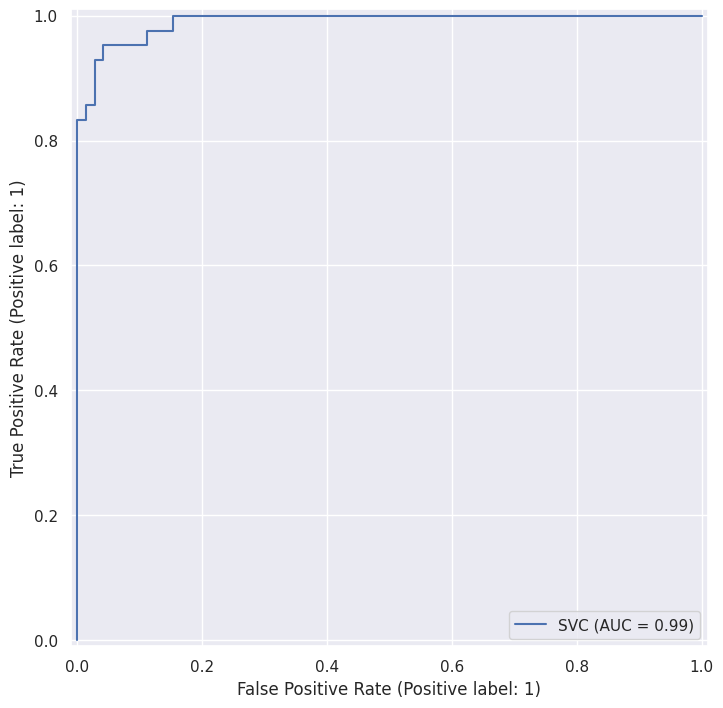

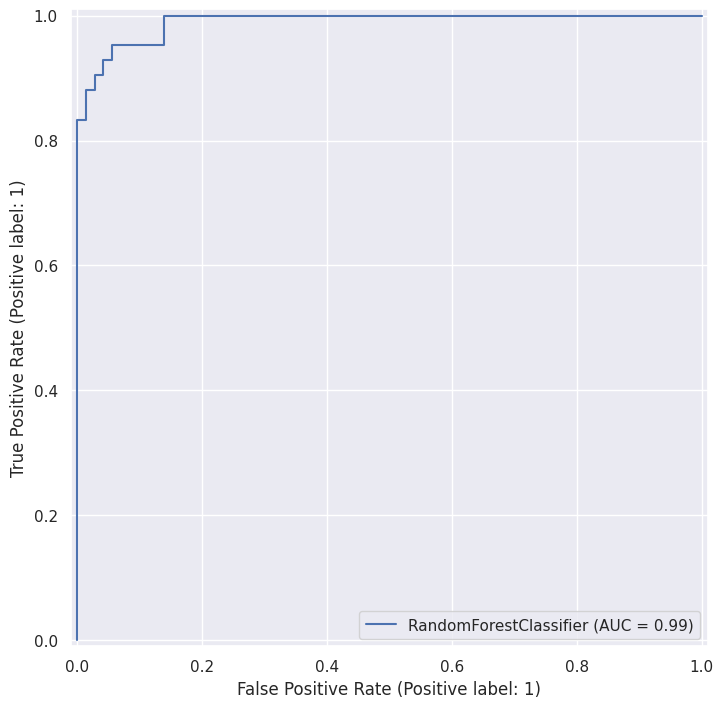

In [17]:
from sklearn.model_selection import train_test_split

# Elegimos las primeras 5 componentes principales
X_pca_5 = X_pca[:,:5]

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_pca_5, y, test_size=0.2, random_state=42, stratify=y)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# REGRESIÓN LOGÍSTICA
lr = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear','lbfgs']
}

# SVM (con kernel RBF)
svm = SVC(probability=True)
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto']
}

# RANDOM FOREST
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [None,5,10],
    'min_samples_split': [2,5]
}

# Función para entrenar y devolver mejor modelo
def train_model(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Mejores parámetros: {grid.best_params_}")
    return grid.best_estimator_

# Entrenamiento
best_lr = train_model(lr, lr_params, X_train, y_train)
best_svm = train_model(svm, svm_params, X_train, y_train)
best_rf = train_model(rf, rf_params, X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

# Función para evaluar
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("AUC-ROC:", auc)
    print("Matriz de confusión:\n", cm)

    # Curva ROC
    RocCurveDisplay.from_estimator(model, X_test, y_test)

    return {'accuracy':acc, 'precision':prec, 'recall':rec, 'f1':f1, 'auc':auc, 'conf_matrix':cm}

# Evaluación de los tres modelos
print("=== Regresión Logística ===")
metrics_lr = evaluate_model(best_lr, X_test, y_test)

print("\n=== SVM ===")
metrics_svm = evaluate_model(best_svm, X_test, y_test)

print("\n=== Random Forest ===")
metrics_rf = evaluate_model(best_rf, X_test, y_test)


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Tras el análisis realizado, se puede concluir que la Regresión Logística es el modelo más apropiado para este conjunto de datos.
Su desempeño por su alta precisión y excelente AUC-ROC, lo que garantiza tanto la correcta identificación de tumores malignos como un bajo número de falsos positivos.
La elección de este modelo se ve reforzada por su interpretabilidad, un factor crucial en contextos médicos donde es importante entender las contribuciones de cada variable a la predicción.
El preprocesamiento, incluyendo la normalización de variables y la eliminación de multicolinealidad, junto con la reducción de dimensionalidad mediante PCA, permitió simplificar el dataset, reducir ruido y evitar que variables redundantes dominaran el análisis, lo que se tradujo en modelos más estables y generalizables.